In [1]:
import scipy.stats as st
st.norm.cdf(700,494,100)-st.norm.cdf(400,494,100)

0.8066919492519985

In [2]:
2**.5

1.4142135623730951

In [3]:
import math as m

In [4]:
m.sqrt(2)

1.4142135623730951

In [6]:
st.norm.cdf(446,448,21/m.sqrt(49))-st.norm.cdf(441,448,21/m.sqrt(49))

0.24267720891827757

In [7]:
# Estimation using z-statistic
xbar = 6.5
n = 100
psd = 3.2

z = st.norm.ppf(.025)

mu1 = xbar + z*psd/m.sqrt(n)
mu2 = xbar - z*psd/m.sqrt(n)

print(mu1, mu2)

5.872811524947182 7.127188475052818


In [8]:
# Estimation using t-statistic

xbar = 10.37
n = 15
ssd = 3.5

t = st.t.ppf(.025,n-1)

mu1 = xbar + t*ssd/m.sqrt(n) 
mu2 = xbar - t*ssd/m.sqrt(n)

print(mu1,mu2)

8.431764604523753 12.308235395476245


## Hypothesis testing

In [9]:
import pandas as pd

In [10]:
import os
os.chdir('/Users/learnersgalaxy/OneDrive/Datasets')

In [12]:
students = pd.read_csv('Students - HYP.csv')

In [13]:
students.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [20]:
n = students.Math1.count()
xbar = students.Math1.mean()
ssd = students.Math1.std()  
mu = 60

t = (xbar-mu)/(ssd/m.sqrt(n))

pvalue = st.t.cdf(t,n-1)

print(xbar,n,ssd,t,pvalue)

52.645 200 9.368447794077296 -11.102736525713397 6.669579055273917e-23


In [22]:
t,p=st.ttest_1samp(students.Math1,60)

In [24]:
p

1.3339158110547646e-22

In [23]:
p/2

6.669579055273823e-23

In [25]:
xbar

52.645

In [26]:
n = students.Math1.count()
xbar = students.Math1.mean()
ssd = students.Math1.std()  
mu = 60

t = (xbar-mu)/(ssd/m.sqrt(n))

pvalue = 1-st.t.cdf(t,n-1)

print(xbar,n,ssd,t,pvalue)

52.645 200 9.368447794077296 -11.102736525713397 1.0


In [27]:
t,p=st.ttest_1samp(students.Math1,60)

In [28]:
p

1.3339158110547646e-22

In [29]:
1-p/2

1.0

In [33]:
t,pval = st.ttest_1samp(students.Math1,50)

In [34]:
pval/2

4.591919716259309e-05

In [35]:
n = students.Math1.count()
xbar = students.Math1.mean()
ssd = students.Math1.std()  
mu = 50

t = (xbar-mu)/(ssd/m.sqrt(n))

pvalue = 1-st.t.cdf(t,n-1)

print(xbar,n,ssd,t,pvalue)

52.645 200 9.368447794077296 3.9927584106746403 4.5919197162569425e-05


In [36]:
st.ttest_ind(students[students['Gender']==0].Math1,students[students['Gender']==1].Math1)

Ttest_indResult(statistic=0.41299864929688507, pvalue=0.6800544974232143)

In [37]:
st.ttest_rel(students['Math1'],students['Math2'])

Ttest_relResult(statistic=1.3555927189268235, pvalue=0.17676525605507354)

## Anova

In [39]:
students.Prog.unique()

array([1, 3, 2])

In [40]:
# Compare Math1 for 3 types of programs

In [41]:
from statsmodels.formula.api import ols

In [42]:
import statsmodels.api as sm

In [43]:
fit = ols('Math1 ~ Prog',data=students).fit()

anova_mod = sm.stats.anova_lm(fit)
anova_mod

,df,sum_sq,mean_sq,F,PR(>F)
Prog,1.0,393.527279,393.527279,4.564033,0.033878
Residual,198.0,17072.267721,86.223574,NaN,NaN


## Correlation and Regression

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
hp = pd.read_csv('House Prices - Reg.csv')

In [46]:
hp.head(3)

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0


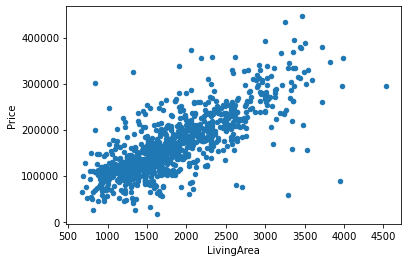

In [53]:
hp.plot(kind='scatter',x='LivingArea',y='Price')
plt.show()

In [54]:
corr_coef = hp.corr()

In [55]:
corr_coef

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
Price,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
LivingArea,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Bathrooms,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Bedrooms,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
LotSize,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Age,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Fireplace,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


In [56]:
hp.Price.corr(hp.LivingArea)

0.7763964501037222

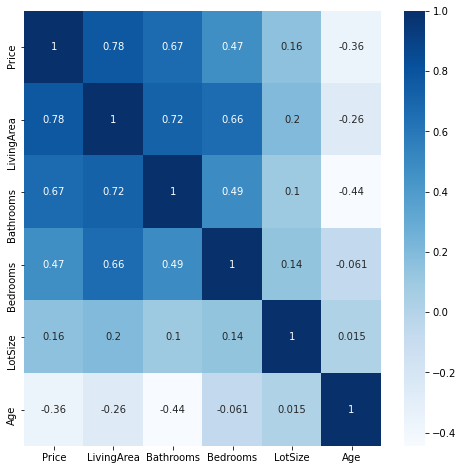

In [64]:
plt.figure(figsize=(8,8))
sns.heatmap(hp.drop(columns='Fireplace').corr(),annot=True,cmap='Blues')
plt.show()

In [65]:
m=np.ones_like(hp.drop(columns='Fireplace').corr())
m

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [67]:
m[np.tril_indices_from(m)]=0

In [68]:
m

array([[0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

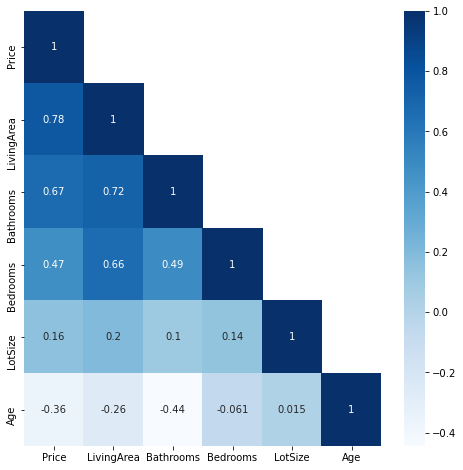

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(hp.drop(columns='Fireplace').corr(),annot=True,cmap='Blues',mask=m)
plt.show()

## Regression Modelling

In [70]:
from sklearn.model_selection import train_test_split as split

In [71]:
train_hp, test_hp = split(hp, test_size=.30, random_state=2021)

In [73]:
print(train_hp.shape[0],test_hp.shape[0])

732 315


In [75]:
from statsmodels.formula.api import ols

mod = ols('Price ~ LivingArea+Age',data=train_hp)
lm_fit=mod.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     662.5
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          1.05e-164
Time:                        17:21:41   Log-Likelihood:                -8792.9
No. Observations:                 732   AIC:                         1.759e+04
Df Residuals:                     729   BIC:                         1.761e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.667e+04   4900.952      7.481      0.000     2.7e+04    4.63e+04
LivingArea    75.8598      2.344     32.361      0.000      71.258      80.462
Age         -354.3272     41.924     -8.452      0.000    -436.633    -272.021
==============================================================================
Omnibus:                      124.366   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.976
Skew:                           0.779   Prob(JB):                     5.80e-95
Kurtosis:                       6.436   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""